In [1]:
import pandas as pd
from sqlalchemy import create_engine

with open('.dburi', 'r') as f:
    db_uri = f.read()

engine = create_engine(db_uri)
connection = engine.connect()

df = pd.read_sql_table("tsla", con=connection)

In [10]:
df["datetime"] = pd.to_datetime(df.timestamp, unit='ms')

date_df = df.set_index(df['datetime'])
date_df = date_df.sort_index()

resampled = date_df.rolling('7D').mean()

<AxesSubplot: xlabel='datetime', ylabel='high'>

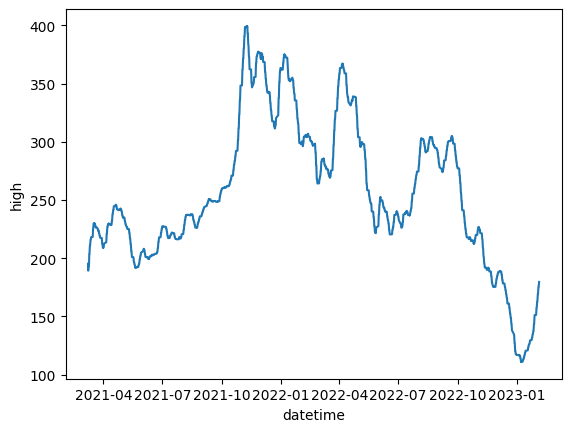

In [17]:
import seaborn as sns

sns.lineplot(x=resampled.index, y=resampled.high)